<a href="https://colab.research.google.com/github/PrachiShirsath/Hello_world/blob/main/road_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("RA2021_A16.csv")
df.head()


,States/UTs,Total Number of Persons Injured in Road Accidents on State Highways during 2018,Total Number of Persons Injured in Road Accidents on State Highways during 2019,Total Number of Persons Injured in Road Accidents on State Highways during 2020,Total Number of Persons Injured in Road Accidents on State Highways during 2021
0,Andhra Pradesh,6084.0,5949.0,4830.0,4786.0
1,Arunachal Pradesh,109.0,117.0,60.0,106.0
2,Assam,2010.0,1869.0,1416.0,1460.0
3,Bihar,1453.0,1628.0,1372.0,1927.0
4,Chhattisgarh,2866.0,2906.0,1831.0,2056.0


In [ ]:
df = df.rename(columns={
    df.columns[1]: "Injured_2018",
    df.columns[2]: "Injured_2019",
    df.columns[3]: "Injured_2020",
    df.columns[4]: "Injured_2021"
})

df.head()


,States/UTs,Injured_2018,Injured_2019,Injured_2020,Injured_2021
0,Andhra Pradesh,6084.0,5949.0,4830.0,4786.0
1,Arunachal Pradesh,109.0,117.0,60.0,106.0
2,Assam,2010.0,1869.0,1416.0,1460.0
3,Bihar,1453.0,1628.0,1372.0,1927.0
4,Chhattisgarh,2866.0,2906.0,1831.0,2056.0


In [ ]:
df_long = df.melt(
    id_vars=["States/UTs"],
    value_vars=["Injured_2018", "Injured_2019", "Injured_2020", "Injured_2021"],
    var_name="Year",
    value_name="Injured"
)

df_long["Year"] = df_long["Year"].str.extract("(\d+)")
df_long["Year"] = df_long["Year"].astype(int)

df_long.head()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-798811772.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_long["Year"] = df_long["Year"].str.extract("(\d+)")


,States/UTs,Year,Injured
0,Andhra Pradesh,2018,6084.0
1,Arunachal Pradesh,2018,109.0
2,Assam,2018,2010.0
3,Bihar,2018,1453.0
4,Chhattisgarh,2018,2866.0


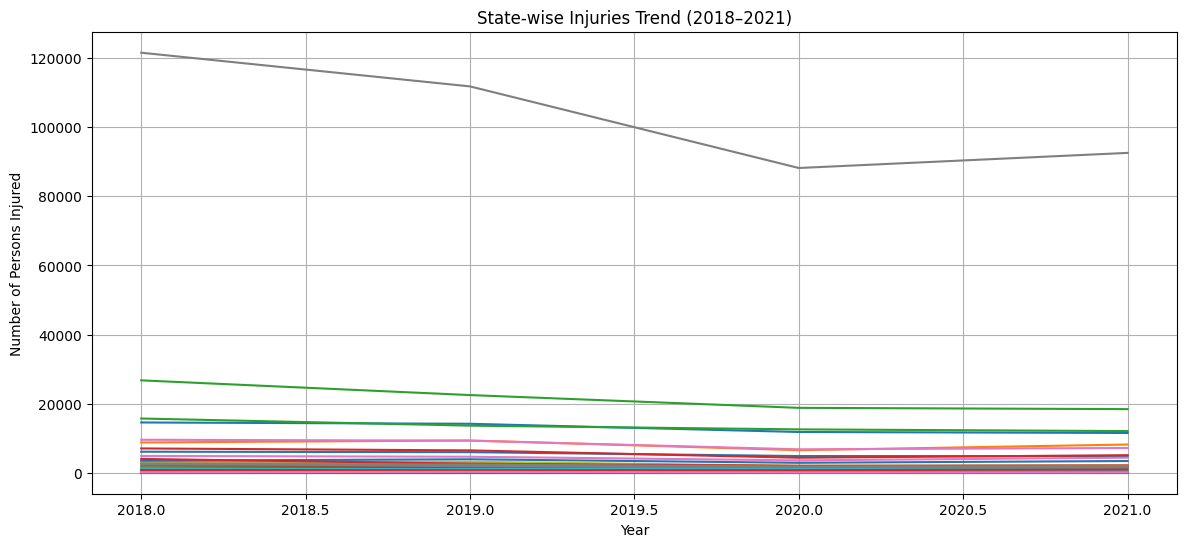

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for state in df["States/UTs"]:
    sdata = df_long[df_long["States/UTs"] == state]
    plt.plot(sdata["Year"], sdata["Injured"])

plt.title("State-wise Injuries Trend (2018–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Persons Injured")
plt.grid(True)
plt.show()


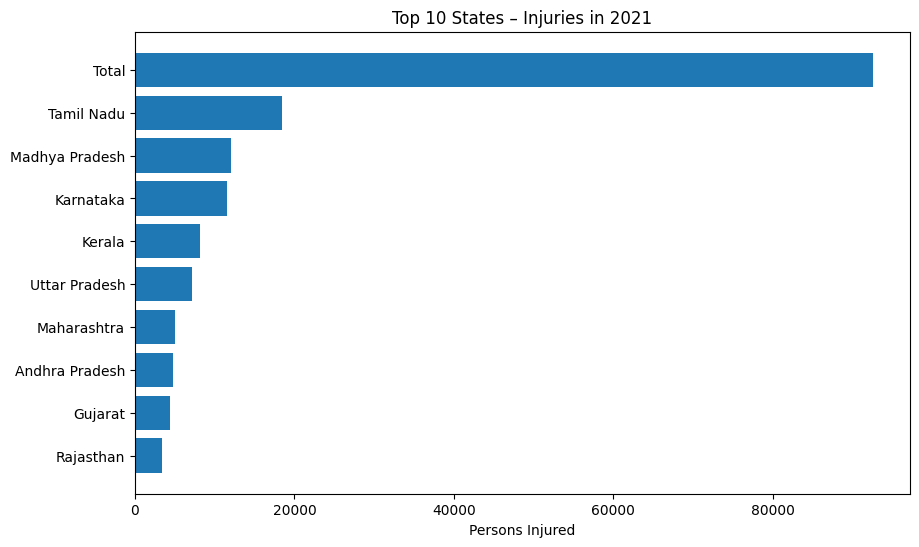

In [ ]:
top10 = df.sort_values("Injured_2021", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["States/UTs"], top10["Injured_2021"])
plt.title("Top 10 States – Injuries in 2021")
plt.xlabel("Persons Injured")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("RA2021_A16.csv")

# Rename columns properly
df = df.rename(columns={
    df.columns[1]: "Injured_2018",
    df.columns[2]: "Injured_2019",
    df.columns[3]: "Injured_2020",
    df.columns[4]: "Injured_2021"
})

df["States/UTs"] = df["States/UTs"].str.title()

df.head()


,States/UTs,Injured_2018,Injured_2019,Injured_2020,Injured_2021
0,Andhra Pradesh,6084.0,5949.0,4830.0,4786.0
1,Arunachal Pradesh,109.0,117.0,60.0,106.0
2,Assam,2010.0,1869.0,1416.0,1460.0
3,Bihar,1453.0,1628.0,1372.0,1927.0
4,Chhattisgarh,2866.0,2906.0,1831.0,2056.0


In [ ]:
import tarfile
import os
import geopandas as gpd

archive_file = "india_states_geojson.tar.gz"

with tarfile.open(archive_file, "r:gz") as tar:
    tar.extractall()
    extracted_files = tar.getnames()

print("Extracted files:", extracted_files)

geojson_file = [f for f in extracted_files if f.endswith(".geojson")][0]
print("Using GeoJSON file:", geojson_file)

india = gpd.read_file(geojson_file)
india.head()


/tmp/ipython-input-1002528136.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Extracted files: ['india_states.geojson']
Using GeoJSON file: india_states.geojson


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.3831, 96.1638 29.37668, ..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.5373, 89.87118 25...."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [ ]:
possible_cols = ["state_name", "ST_NM", "NAME_1", "NAME", "STATE"]

state_col = None
for c in possible_cols:
    if c in india.columns:
        state_col = c
        break

print("Detected state name column:", state_col)

india[state_col] = india[state_col].str.title()


Detected state name column: NAME_1


In [ ]:
merged = india.merge(
    df,
    left_on=state_col,
    right_on="States/UTs",
    how="left"
)


<Figure size 1400x1000 with 0 Axes>

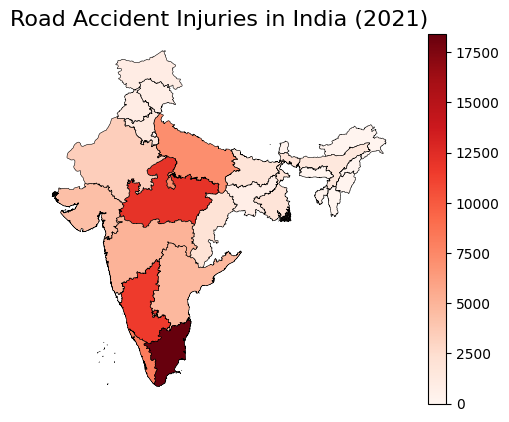

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

merged.plot(
    column="Injured_2021",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.4
)

plt.title("Road Accident Injuries in India (2021)", fontsize=16)
plt.axis("off")
plt.show()


✔ Data cleaned successfully
✔ KMeans clustering complete.
Saved: /content/RA2021_clusters.csv


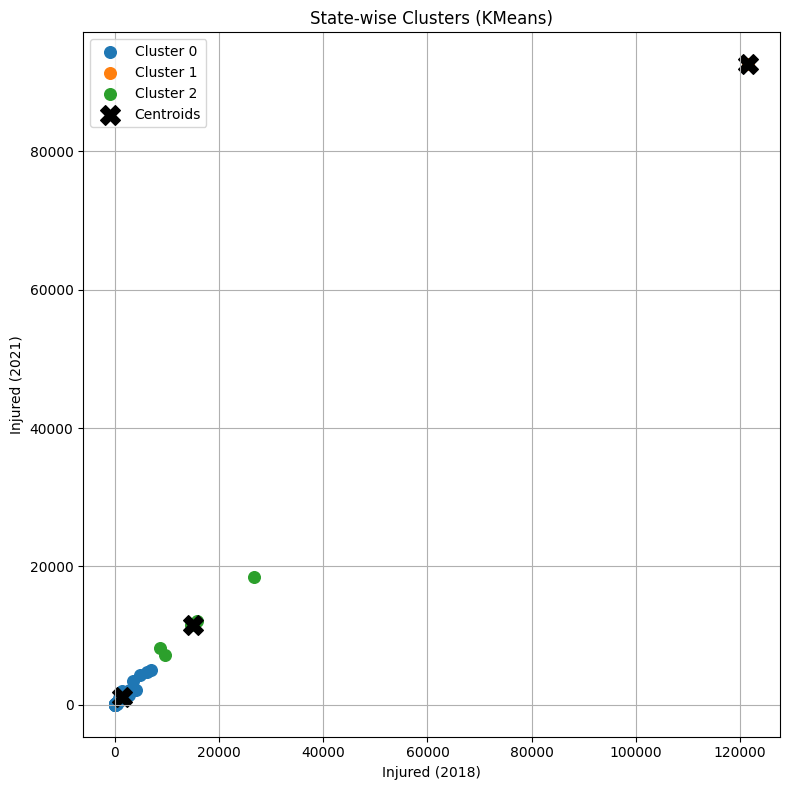

Saved plot: /content/cluster_plot.png


In [ ]:
# ============================================================
# STATE-WISE ACCIDENT CLUSTERING (K-Means)
# Input file: RA2021_A16.csv
# Columns required:
#   States/UTs,
#   Injured 2018, 2019, 2020, 2021
# ============================================================

!pip install pandas matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------
csv_path = "/content/RA2021_A16.csv"

df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]

expected_cols = [
    "States/UTs",
    "Total Number of Persons Injured in Road Accidents on State Highways during 2018",
    "Total Number of Persons Injured in Road Accidents on State Highways during 2019",
    "Total Number of Persons Injured in Road Accidents on State Highways during 2020",
    "Total Number of Persons Injured in Road Accidents on State Highways during 2021",
]

colmap = {c.lower(): c for c in df.columns}
found = []

for e in expected_cols:
    key = e.lower()
    if key in colmap:
        found.append(colmap[key])
    else:
        year = e[-4:]
        matched = None
        for c in df.columns:
            if "injur" in c.lower() and year in c:
                matched = c
                break
        found.append(matched)

state_col, inj2018, inj2019, inj2020, inj2021 = found

# ------------------------------------------------------------
# 2. CLEAN & SELECT FEATURES
# ------------------------------------------------------------
work = df[[state_col, inj2018, inj2019, inj2020, inj2021]].copy()
work.columns = ["state", "injured_2018", "injured_2019", "injured_2020", "injured_2021"]

for col in ["injured_2018", "injured_2019", "injured_2020", "injured_2021"]:
    work[col] = work[col].astype(str).str.replace(",", "").str.strip()
    work[col] = pd.to_numeric(work[col], errors="coerce").fillna(0).astype(int)

print("✔ Data cleaned successfully")

# ------------------------------------------------------------
# 3. SCALE DATA & APPLY CLUSTERING
# ------------------------------------------------------------
features = ["injured_2018", "injured_2019", "injured_2020", "injured_2021"]
X = work[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#cluster(k)
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

work["cluster"] = clusters
print("✔ KMeans clustering complete.")


output_csv = "/content/RA2021_clusters.csv"
work.to_csv(output_csv, index=False)
print("Saved:", output_csv)

# ------------------------------------------------------------
# 4. PLOT CLUSTERS (2018 vs 2021)
# ------------------------------------------------------------
plot_path = "/content/cluster_plot.png"

plt.figure(figsize=(8, 8))
colors_list = ["tab:blue", "tab:orange", "tab:green"]

for c in range(k):
    subset = work[work["cluster"] == c]
    plt.scatter(subset["injured_2018"], subset["injured_2021"], s=70, label=f"Cluster {c}", color=colors_list[c])

# Centroids
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids[:, 0], centroids[:, 3], marker="X", s=200, c="black", label="Centroids")

plt.xlabel("Injured (2018)")
plt.ylabel("Injured (2021)")
plt.title("State-wise Clusters (KMeans)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_path, dpi=160)
plt.show()

print("Saved plot:", plot_path)


In [ ]:
pip install geopandas matplotlib


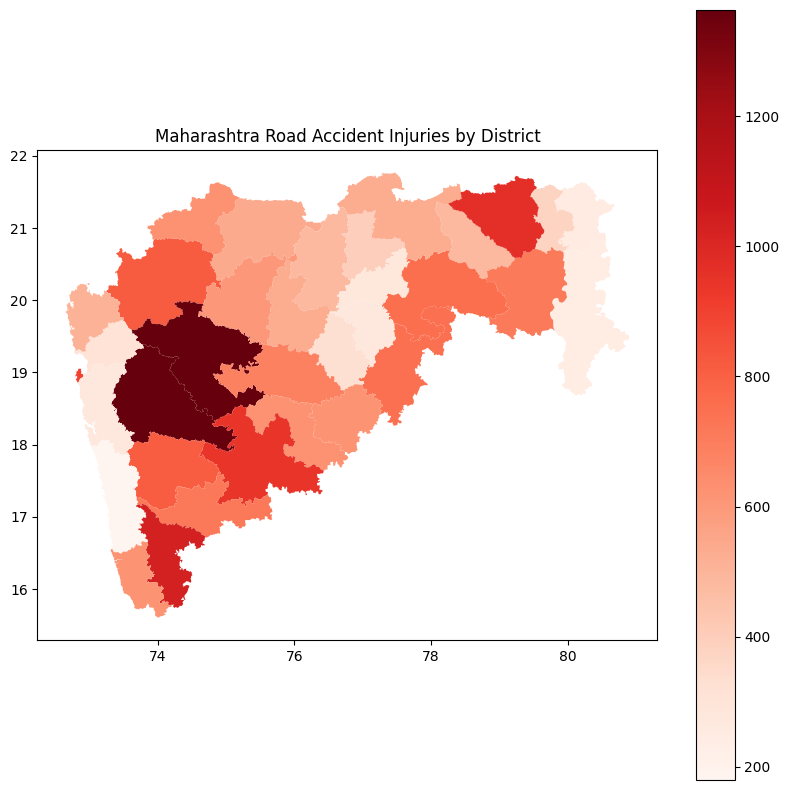

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON
geojson_path = "/content/MAHARASHTRA_DISTRICTS.geojson"
maha_gdf = gpd.read_file(geojson_path)

# Updated accident data
accident_data = {
    "District": ["Akola", "Amravati", "Buldana", "Yavatmal", "Washim", "Aurangabad",
                 "Jalna", "Bid", "Osmanabad", "Nanded", "Latur", "Parbhani",
                 "Hingoli", "Kolhapur", "Pune", "Sangli", "Satara", "Solapur",
                 "Bhandara", "Chandrapur", "Gadchiroli", "Gondiya", "Nagpur",
                 "Wardha", "Ahmadnagar", "Dhule",
                 "Nashik", "Thane", "Raigarh", "Ratnagiri", "Sindhudurg", "Palghar",
                 "Jalgaon", "Mumbai"],

    "Injured": [399, 528, 481, 755, 285, 601, 528, 686, 624, 750, 618, 331,
                272, 1031, 1363, 718, 812, 945, 382, 715, 247, 252, 969, 484, 1360, 628,
                820, 310, 275, 180, 620, 510, 540, 900]
}

accident_df = pd.DataFrame(accident_data)

# Merge using correct column (adjust 'dtname' if GeoJSON uses a different name)
merged_gdf = maha_gdf.merge(accident_df, left_on='dtname', right_on='District', how='left')

# Plot
merged_gdf.plot(column='Injured', cmap='Reds', legend=True, figsize=(10, 10))
plt.title("Maharashtra Road Accident Injuries by District")
plt.show()
